In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
for row in session.query(Measurement,Measurement.prcp).limit(5).all():
    print(row)
    
for row in session.query(Measurement,Measurement.date).limit(5).all():
    print(row)
for row in session.query(Station, Station.elevation).limit(5).all():
    print(row)
print(Measurement.classes.keys())
print(Station.classes.keys())

(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD518>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD588>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD5F8>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD668>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD6D8>, None)
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD898>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD908>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD978>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD9E8>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x0000018EFB1FD6D8>, '2010-01-06')
(<sqlalchemy.ext.automap.station object at 0x0000018EFB209358>, 3.0)
(<sqlalchemy.ext.automap.station object at 0x0000018EFB2093C8>, 14.6)
(<sqlalchemy.ext.automap.station object at 0x0000018EFB209438>, 7.0)
(<sqlalchemy.ex

# Exploratory Climate Analysis

2016-08-23


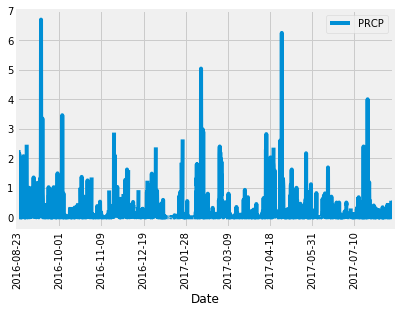

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from today
last_year = dt.date(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=last_year).all()
print(last_year)
# Save the query results as a Pandas DataFrame and set the index to the date column

Prcp_lastyear_df = pd.DataFrame(last_year_data, columns= ["Date","PRCP"])
Prcp_lastyear_df = Prcp_lastyear_df.set_index(Prcp_lastyear_df["Date"])
Prcp_lastyear_df=Prcp_lastyear_df.drop(columns = "Date")

# Sort the dataframe by date
Prcp_lastyear_df=Prcp_lastyear_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
Prcp_plot = Prcp_lastyear_df.plot(rot=90)
# Rotate the xticks for the dates


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_lastyear_df.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
num_stations = len(session.query(Station.station).all())
print("There are " + str(num_stations)+" Stations")
# stations = session.query(Station.station).all()


There are 9 Stations


In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
activity = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = activity[0][0]
session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == str(most_active)).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

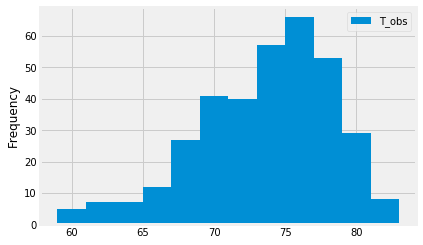

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
T_obs_df = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == most_active).filter(Measurement.date>=last_year).all(), columns =["T_obs"])
T_obs_df.plot.hist(bins = 12)
                    